In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [2]:
# Read the City and Ride Data
with open(city_data_to_load):
    city_data = pd.read_csv(city_data_to_load)
with open(ride_data_to_load):
    ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
all_data = pd.merge(city_data, ride_data, on='city')
# Display the data table for preview
nec_data = (all_data.set_index('type'))
nec_data.head()

,city,driver_count,date,fare,ride_id
type,,,,,
Urban,Richardfort,38,2018-02-24 08:40:38,13.93,5628545007794
Urban,Richardfort,38,2018-02-13 12:46:07,14.00,910050116494
Urban,Richardfort,38,2018-02-16 13:52:19,17.92,820639054416
Urban,Richardfort,38,2018-02-01 20:18:28,10.26,9554935945413
Urban,Richardfort,38,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

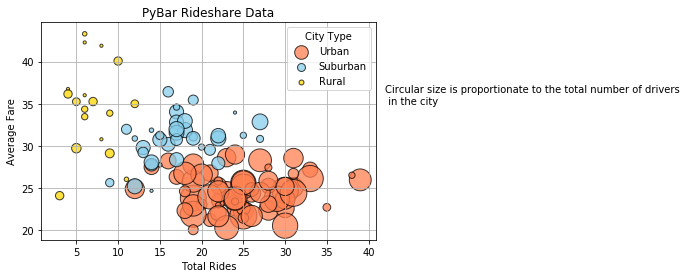

In [3]:
# Obtain the x and y coordinates for each of the three city types
# individual datasets created for each type for easier munging
urb_data = pd.DataFrame(nec_data.loc['Urban', ['city', 'driver_count', 'fare']]).reindex()
sub_data = pd.DataFrame(nec_data.loc['Suburban', ['city', 'driver_count', 'fare']]).reindex()
rur_data = pd.DataFrame(nec_data.loc['Rural', ['city', 'driver_count', 'fare']]).reindex()

# function used to mung (idk if I am using that word correctly) data sets previously created
def cln_cln(df):
    frsh = pd.unique(df['city'])
    so_frsh = []
    cln = df.set_index('city')
    for y in frsh:
        avg_f = cln.loc[y, 'fare']
        avg_f = round(avg_f.mean(), 2)
        num_dr = cln.loc[y, 'driver_count']
        num_rids = num_dr.value_counts()
        so_frsh.append({'city': y, 'Average Fare': avg_f, '# of Drivers': num_dr.values[0], '# of Rides': num_rids.values[0]})
        next
    return so_frsh

# use of function cln_cln
frshcln_urb = pd.DataFrame(cln_cln(urb_data))
frshcln_sub = pd.DataFrame(cln_cln(sub_data))
frshcln_rur = pd.DataFrame(cln_cln(rur_data))
# Build the scatter plots for each city types with use of a function
def scat_dat(df, fc):
    if fc == 0:
        fc = 'coral'
        leg = 'Urban'
    elif fc == 1:
        fc = 'skyblue'
        leg = 'Suburban'
    else:
        fc = 'gold' 
        leg = 'Rural'
    # creation of scatter plot with necessary characteristics, I also scaled the size of the points by
    # a multiple of 10 for greater ease of interpretation
    scat_it = plt.scatter(df['# of Rides'], df['Average Fare'], s= df['# of Drivers']*10,  marker= 'o', facecolors= fc, 
                           edgecolors='black', alpha= 0.75)
    scat_it.set_label(leg)
    plt.legend(markerscale= 0.7, title='City Type')
    return scat_it

# uses function scat_dat and displays the scatterplots overlapping one another
plt.title('PyBar Rideshare Data')
plt.xlabel('Total Rides')
plt.ylabel('Average Fare')
plt.text(42, 35, 'Circular size is proportionate to the total number of drivers\n in the city')
plt.grid(True)
all_scat = plt.show([scat_dat(frshcln_urb, 0), (scat_dat(frshcln_sub, 1)), (scat_dat(frshcln_rur, 2))])

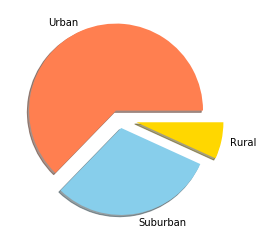

In [41]:
# finds the total of fares through the service
fare_tot = nec_data.loc['Urban', 'fare'].sum() + nec_data.loc['Suburban', 'fare'].sum() + nec_data.loc['Rural', 'fare'].sum()
# finds the percentage based on city type
urb_pf = round((nec_data.loc['Urban', 'fare'].sum()/fare_tot)*100, 2)
sub_pf = round((nec_data.loc['Suburban', 'fare'].sum()/fare_tot)*100, 2)
rur_pf = round((nec_data.loc['Rural', 'fare'].sum()/fare_tot)*100, 2)
# creates pie chart
pie_time = [urb_pf, sub_pf, rur_pf]
omy_pie = plt.pie(pie_time, labels=['Urban','Suburban', 'Rural'], colors=['coral', 'skyblue', 'gold'], shadow=0.5, explode=[0.1, 0.11, 0.2])
plt.show(omy_pie)

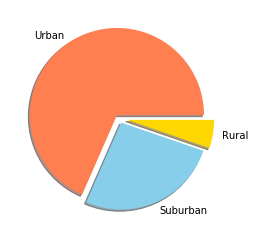

In [40]:
# finds the total number of rides
ride_tot = urb_data['city'].count() + sub_data['city'].count() + rur_data['city'].count()
#finds the percentage of rides based on city type
urb_rp = round((urb_data['city'].count()/ride_tot)*100, 2)
sub_rp = round((sub_data['city'].count()/ride_tot)*100, 2)
rur_rp = round((rur_data['city'].count()/ride_tot)*100, 2)
# creates the pie chart
piensky = plt.pie([urb_rp, sub_rp, rur_rp], labels=['Urban', 'Suburban', 'Rural'], colors=['coral', 'skyblue', 'gold'],
                 shadow=0.75, explode=[0.05, 0.05, 0.09])
plt.show(piensky)

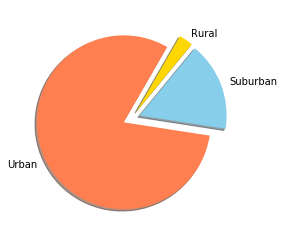

In [42]:
# fidns the total number of drivers
driver_tot = frshcln_urb['# of Drivers'].sum() + frshcln_sub['# of Drivers'].sum() + frshcln_rur['# of Drivers'].sum()
# percentage of drivers based on city type
urb_dp = frshcln_urb['# of Drivers'].sum()/driver_tot
sub_dp = frshcln_sub['# of Drivers'].sum()/driver_tot
rur_dp = frshcln_rur['# of Drivers'].sum()/driver_tot
# creates the pie chart
dry_pie = plt.pie([urb_dp, sub_dp, rur_dp], labels=['Urban', 'Suburban', 'Rural'], 
                  colors=['coral', 'skyblue', 'gold'], startangle= 60, explode=[0.1,0.1,0.1], shadow = .8)
plt.show(dry_pie)